DAY 01

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gandepraneeth","key":"e745053f4782ca13b5506926698582c1"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape}, Test shape: {x_test.shape}")

x_train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [ ]:
x_train = x_train / 255.0
x_test_ = x_test/ 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


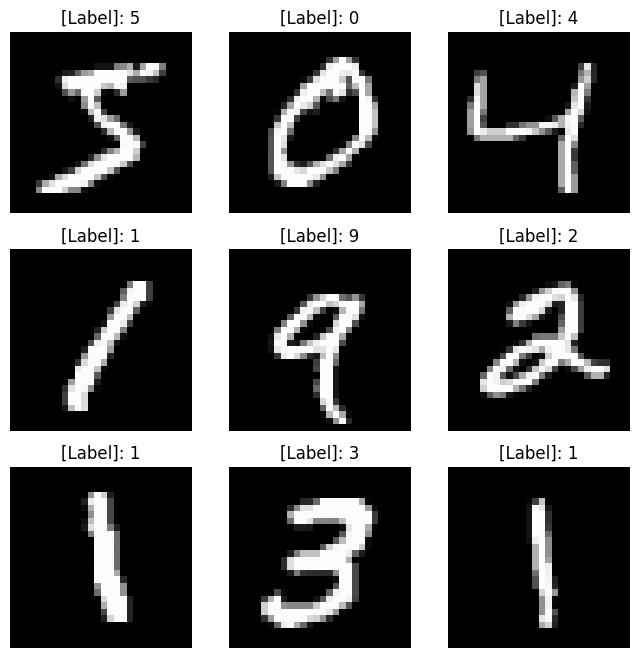

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f"[Label]: {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
(x_train_c10, y_train_c10),(x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape} ")

CIFAR-10 train shape: (50000, 32, 32, 3) 


DAY 02

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten

model = Sequential ([
  Conv2D(32, (3,3),activation = 'relu', input_shape = (28,28,1)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3),activation ='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10,activation= 'softmax')
])

model. compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model. summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train,y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8940 - loss: 0.3391 - val_accuracy: 0.9812 - val_loss: 0.0628
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9845 - loss: 0.0493 - val_accuracy: 0.9847 - val_loss: 0.0514
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9906 - loss: 0.0304 - val_accuracy: 0.9881 - val_loss: 0.0387
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9881 - val_loss: 0.0431
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9958 - loss: 0.0149 - val_accuracy: 0.9856 - val_loss: 0.0549


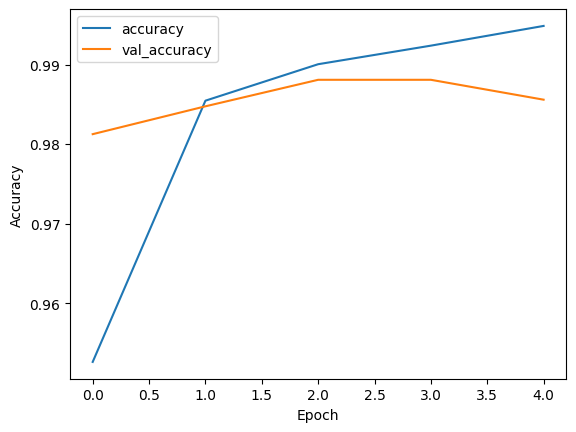

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: {test_acc:df}")
y_pred = model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9774 - loss: 16.5601
Test accuracy: {test_acc:df}
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential ([
  Conv2D(32, (3,3),activation = 'relu', input_shape = (28,28,1)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3),activation ='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10,activation= 'softmax')
])

model. compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Day 03

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True
)
datagen.fit(x_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3),activation = 'relu', input_shape = (32,32,3)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3),activation ='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10,activation= 'softmax')
])
model. compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10, y_train_c10, batch_size=32), epochs=10,validation_data=(x_test_c10, y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.2981 - loss: 1.8878 - val_accuracy: 0.5059 - val_loss: 1.3637
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.4383 - loss: 1.5428 - val_accuracy: 0.5525 - val_loss: 1.2510
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.4829 - loss: 1.4294 - val_accuracy: 0.5695 - val_loss: 1.2087
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5076 - loss: 1.3684 - val_accuracy: 0.6033 - val_loss: 1.1355
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.5258 - loss: 1.3281 - val_accuracy: 0.5993 - val_loss: 1.1483
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.5395 - loss: 1.2896 - val_accuracy: 0.6092 - val_loss: 1.1076
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.5552 - loss: 1.2548 - val_accuracy: 0.6075 - val_loss: 1.1114
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 54ms/step - accuracy: 0.5635 - loss: 1.2

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1000
           1       0.57      0.89      0.69      1000
           2       0.70      0.32      0.43      1000
           3       0.54      0.37      0.44      1000
           4       0.66      0.51      0.58      1000
           5       0.61      0.55      0.58      1000
           6       0.58      0.81      0.67      1000
           7       0.65      0.75      0.70      1000
           8       0.76      0.63      0.69      1000
           9       0.61      0.75      0.67      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.61     10000
weighted avg       0.63      0.63      0.61     10000



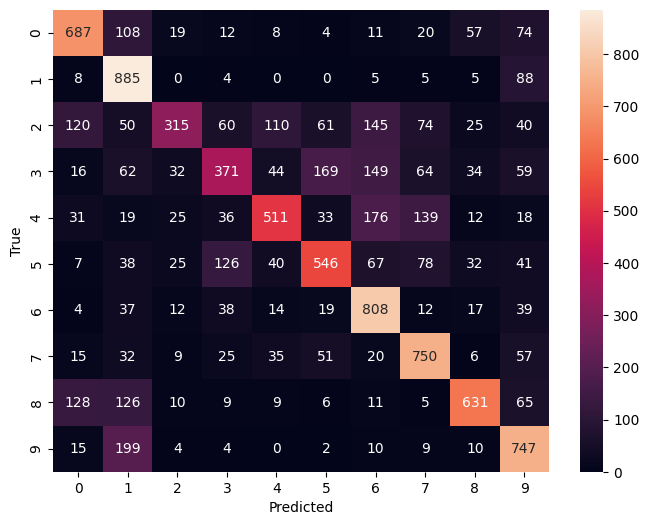

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)
c=confusion_matrix(y_test_c10, y_pred)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_c10, y_pred_c10), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Day 04

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as  zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
'/content/dogs-vs-cats',
target_size=(224,224),
batch_size=32,
class_mode='binary',
subset='training'
)
val_generator = datagen. flow_from_directory(
'/content/dogs-vs-cats',
target_size=(224,224),
batch_size=32,
class_mode='binary',
subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import GlobalAveragePooling2D, Dense

base_model= MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3) )
base_model. trainable=False

model=Sequential ([base_model, GlobalAveragePooling2D(), Dense(128, activation= 'relu'), Dense(1 , activation='sigmoid' )])
model. compile(optimizer='adam', loss= 'binary_crossentropy',metrics=['accuracy'])
model. fit(train_generator, epochs=5, validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 0.7800 - loss: 0.5500 - val_accuracy: 0.7985 - val_loss: 0.5115
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 369s 1s/step - accuracy: 0.7927 - loss: 0.5049 - val_accuracy: 0.7985 - val_loss: 0.5221
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.7979 - loss: 0.4895 - val_accuracy: 0.7980 - val_loss: 0.5280
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.8126 - loss: 0.4581 - val_accuracy: 0.7985 - val_loss: 0.5209
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.8116 - loss: 0.4419 - val_accuracy: 0.7885 - val_loss: 0.5397


In [ ]:
base_model. trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy' ])
model.fit(train_generator, epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1487s 6s/step - accuracy: 0.7950 - loss: 0.4953 - val_accuracy: 0.7890 - val_loss: 0.5382
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1461s 6s/step - accuracy: 0.8059 - loss: 0.4458 - val_accuracy: 0.7875 - val_loss: 0.5400
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1451s 6s/step - accuracy: 0.8105 - loss: 0.4205 - val_accuracy: 0.7865 - val_loss: 0.5409


In [ ]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf. keras.models. load_model( 'mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step


/tmp/ipython-input-1772913221.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


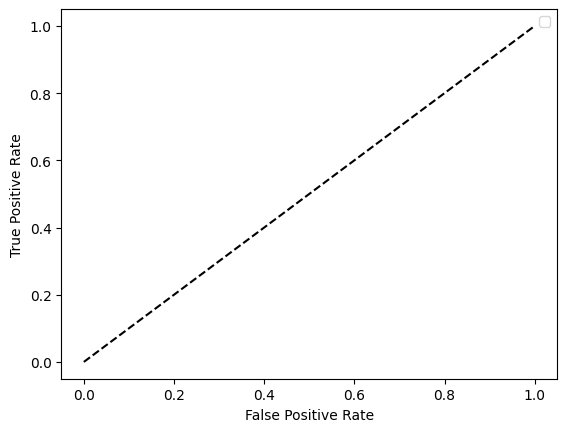

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba=loaded_model.predict(val_generator)
fpr, tpr,_=roc_curve(val_generator.classes,y_pred_proba)

Noc_auc=auc(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Day 05

In [ ]:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Get the filename from the uploaded dictionary
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(224, 224))
img_array = image. img_to_array(img)
img_array = np. expand_dims (img_array, axis=0)
img_array = preprocess_input(img_array)
prediction = loaded_model. predict (img_array)
print ("Predicted class:", "Dog" if prediction [0][0] > 0.5 else "Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted class: Dog


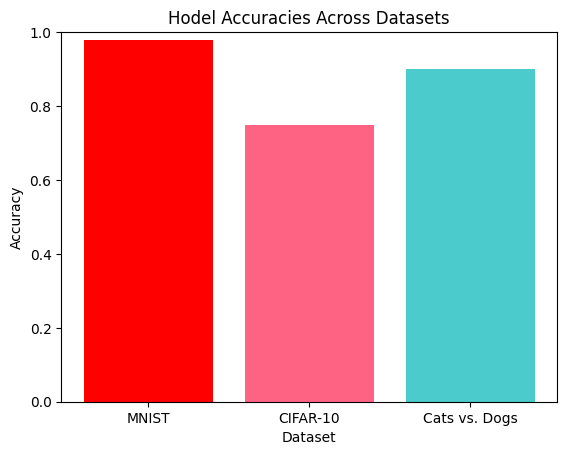

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10','Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt. bar (datasets, accuracies, color=['#FF0000','#FF6384','#4BCBCB'])
plt. title('Hodel Accuracies Across Datasets')
plt. xlabel ('Dataset' )
plt. ylabel('Accuracy')
plt.ylim(0,1)
plt.show()